In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
f = open('../data/U00096.fna')
lines = f.readlines()
#ignoring the first line and concat everything to make a strand
lines1 = [i.strip() for i in lines[1:]]
strand = ''
for i in lines1:
    strand+=i

In [3]:
strand

'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGGTAACGAGGTAACAACCATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCAACGGTTCCGACTACTCTGCTGCGGTGCTGGCTGCCTGTTTACGCGCCGAT

In [24]:
def break_strand(strand, L):
    sd = {}
    slen = len(strand)
    N = 0
    for i in range(0, slen, L):
        subs = strand[i:min(slen,i+L)]
        if len(subs)==L:
            if subs in sd:
                sd[subs] += 1
                N += 1
            else:
                sd[subs] = 1
                N += 1
    sdp = {}
    for k in sd:
        sdp[k] = sd[k]/N
    sump=0
    for k in sdp:
        sump -= sdp[k]*np.log(sdp[k])
    return sd, N, sdp, sump/len(strand)

In [25]:
sd, N, sdp, sump = break_strand(strand, 10)

In [32]:
sump_list=[]
for L in range(1,25):
    _, _, _, s = break_strand(strand, L)
    sump_list.append(s)

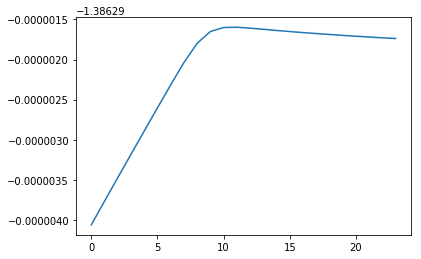

In [34]:
import matplotlib.pyplot as plt
plt.plot(np.array(sump_list)-np.log(4))